## README.md

### Análise de Duração de Músicas ao Longo dos Últimos 20 Anos

Este repositório contém um código em Python (Main.py) que realiza uma análise da duração das músicas ao longo dos últimos 20 anos. O código utiliza bibliotecas como Pandas, NumPy, Matplotlib e Seaborn para carregar os dados, realizar visualizações e calcular estatísticas.

### Objetivo

O objetivo deste código é analisar a variação da duração das músicas ao longo dos últimos 20 anos, fornecendo insights sobre tendências temporais e padrões de duração de músicas em diferentes gêneros.

### Dependências Externas

Para executar este código, é necessário ter as seguintes dependências externas instaladas:

- Python (versão 3.x)
- Pandas
- NumPy
- Matplotlib
- Seaborn
- scikit-learn

### Variáveis de Ambiente

Não há variáveis de ambiente necessárias para a execução deste código.

### Como Usar

1. Clone este repositório em sua máquina local.
2. Certifique-se de ter todas as dependências externas instaladas.
3. Execute o arquivo `Main.py` em um ambiente Python.

### Fluxo de Execução

1. O código carrega um arquivo Excel contendo dados sobre músicas.
2. Filtra os dados para incluir apenas músicas a partir de 1999.
3. Realiza visualizações exploratórias dos dados, como gráficos de dispersão e histogramas.
4. Calcula a média da duração das músicas por ano e cria um gráfico de linha para visualizar as variações ao longo do tempo.
5. Identifica os artistas mais reproduzidos e cria um gráfico de barras.
6. Identifica as músicas com maior e menor duração para cada ano e cria um gráfico para visualização.
7. Agrupa os dados por ano e gênero, contando a frequência de cada gênero em cada ano.

### Saída

A saída deste código inclui:

- Visualizações gráficas que mostram a variação da duração das músicas ao longo do tempo.
- Estatísticas sobre os artistas mais reproduzidos.
- Identificação das músicas com maior e menor duração para cada ano.
- Contagem da frequência de gêneros musicais ao longo dos anos.

### Contribuições

Contribuições são bem-vindas! Sinta-se à vontade para propor melhorias, corrigir bugs ou adicionar novos recursos a este código. Por favor, abra um pull request com suas alterações.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
caminho_arquivo = 'Data-base.xlsx'

# Definir os nomes das colunas
nomes_colunas = ['cantor', 'nome da musica','genero','ano','drc']

# Carregar o arquivo para um DataFrame do Pandas e definir o cabeçalho
dados = pd.read_excel(caminho_arquivo, names=nomes_colunas)
dados= dados[dados['ano'] >= 1999]
#dados = dados.drop_duplicates()
#dados['cantor'] = dados['cantor'].astype(str)
dados['drc'] = dados['drc'].astype(float)
#dados['drc'] = pd.to_numeric(dados['drc'], errors='coerce')

display(dados.head())
dados.shape

,cantor,nome da musica,genero,ano,drc
0,The Pussycat Dolls,Buttons,dance pop,2005,3.76
1,Eminem,Mockingbird,hip hop,2004,4.18
2,Kanye West,Gold Digger,hip hop,2005,3.46
3,Shakira,Hips Don't Lie (feat. Wyclef Jean),pop,2005,3.63
4,50 Cent,Candy Shop,hip hop,2005,3.49


(3342, 5)

In [23]:
contagem_de_genero = dados['genero'].value_counts()

df_contagem_generos = pd.DataFrame(contagem_de_genero).reset_index()
df_contagem_generos.columns = ['Gênero', 'Contagem']

display(df_contagem_generos.head(10))

,Gênero,Contagem
0,sertanejo,520
1,pop,425
2,dance pop,335
3,hip hop,288
4,arrocha,169
5,axe,158
6,brazilian rock,135
7,funk carioca,95
8,pagode,91
9,alternative metal,81


In [26]:
contagem_anos = dados['ano'].value_counts()

df_contagem_anos = pd.DataFrame(contagem_anos).reset_index()
df_contagem_anos.columns = ['Ano', 'Contagem']

display(df_contagem_anos)

,Ano,Contagem
0,2005,188
1,2023,184
2,2022,183
3,2019,177
4,2001,172
5,2017,168
6,2018,159
7,2016,152
8,2003,138
9,2002,136


In [ ]:
sns.pairplot(dados)

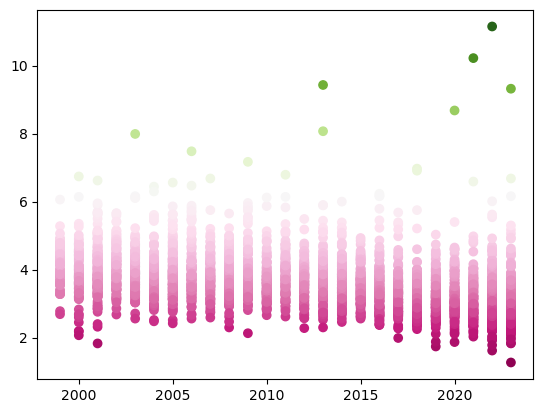

In [5]:
fig, ax = plt.subplots()
y= dados['drc']
x= dados['ano']
ax.scatter(x,y, c= dados['drc'], cmap='PiYG')
plt.show()

In [6]:
# Reshape dos arrays unidimensionais para bidimensionais
x = x.values.reshape(-1, 1)  # Transforma x em uma matriz 2D
y = y.values  # Mantém y como uma array unidimensional
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [7]:
a_coeff = modelo.coef_
l_coeff = modelo.intercept_
print(f'coeficiente Angular: {a_coeff} Coeficiente Linear: {l_coeff} ')

coeficiente Angular: [-0.04262609] Coeficiente Linear: 89.3825061422421 


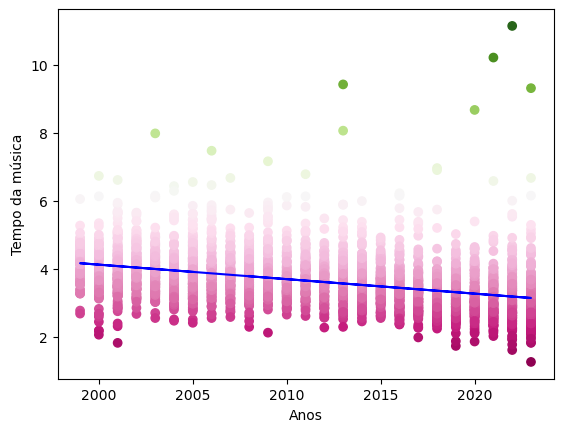

In [9]:
fig, ax = plt.subplots()
y= dados['drc']
x= dados['ano']
ax.scatter(x,y, c= dados['drc'], cmap='PiYG')
plt.xlabel('Anos')
plt.ylabel('Tempo da música')
plt.plot(x,l_coeff+a_coeff*x, color='blue')
plt.savefig('regressao.png', format = 'png')
plt.show()

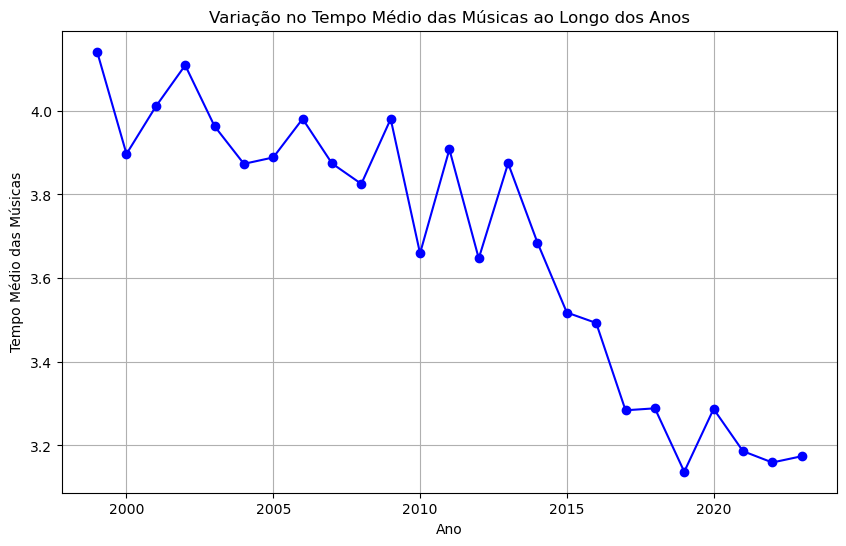

In [10]:
media_tempo_por_ano = dados.groupby('ano')['drc'].mean()

plt.figure(figsize=(10, 6))
plt.plot(media_tempo_por_ano.index, media_tempo_por_ano.values, marker='o', linestyle='-', color='b')


plt.xlabel('Ano')
plt.ylabel('Tempo Médio das Músicas')
plt.title('Variação no Tempo Médio das Músicas ao Longo dos Anos')

plt.grid(True)
plt.savefig('Linha-media.png', format = 'png')
plt.show()

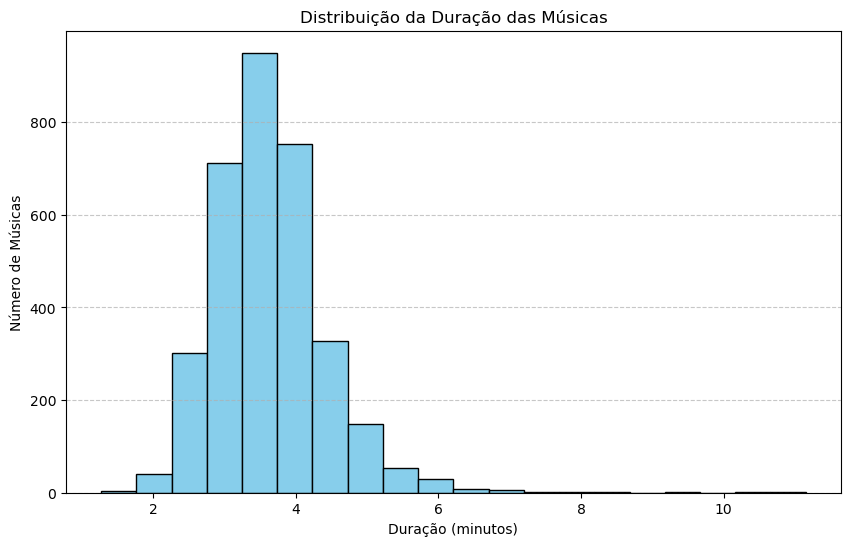

In [12]:

plt.figure(figsize=(10, 6))
plt.hist(dados['drc'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Duração das Músicas')
plt.xlabel('Duração (minutos)')
plt.ylabel('Número de Músicas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Distribuicao.png', format = 'png')
plt.show()

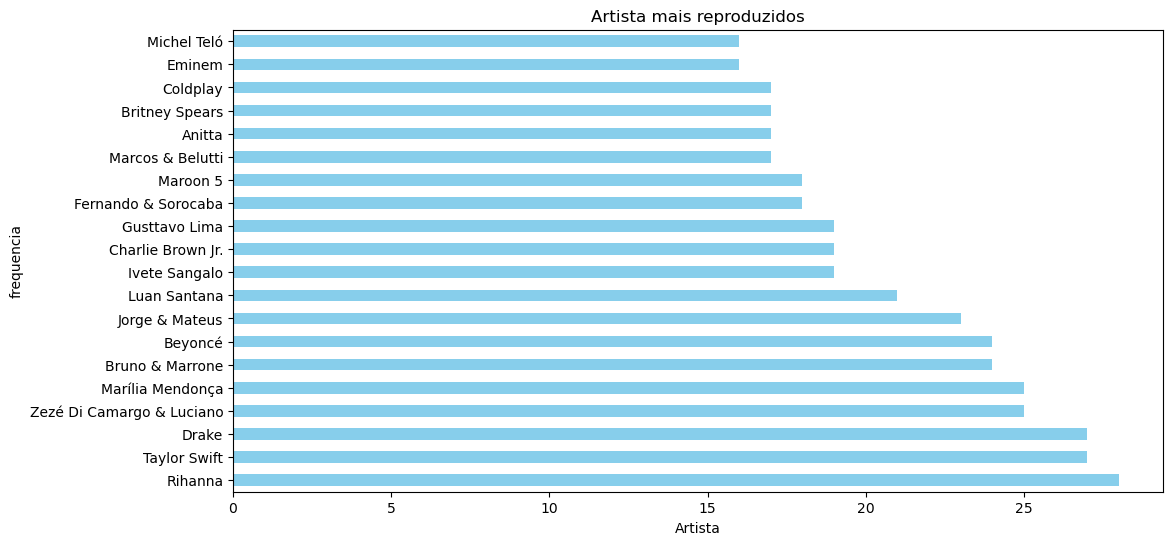

In [13]:
cantores = dados['cantor'].value_counts()
top_10 = cantores.head(20)

plt.figure(figsize=(12,6))

top_10.plot(kind='barh', color='skyblue')

plt.title('Artista mais reproduzidos')
plt.xlabel('Artista')
plt.ylabel('frequencia')
plt.savefig('Cantores.png', format = 'png')
plt.show()

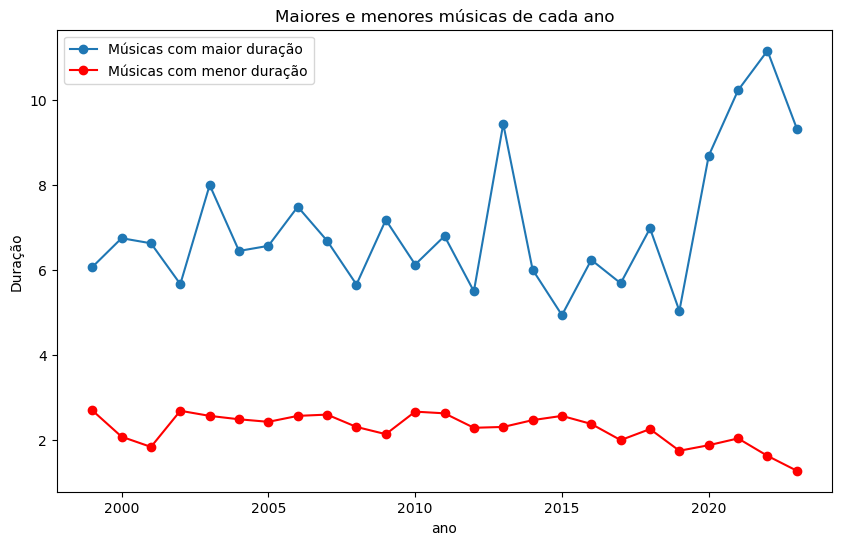

In [14]:
indice_max_duracao = dados.groupby('ano')['drc'].idxmax()

indice_min_duracao = dados.groupby('ano')['drc'].idxmin()

# Selecionar as linhas correspondentes aos índices encontrados
musica_maior_duracao = dados.loc[indice_max_duracao]
musica_menor_duracao = dados.loc[indice_min_duracao]
df_maiores_musicas = pd.DataFrame(musica_maior_duracao)
#display(df_maiores_musicas)
df_menores_musicas = pd.DataFrame(musica_menor_duracao)
#display(df_menores_musicas)

plt.figure(figsize=(10, 6))
plt.plot(df_maiores_musicas['ano'], df_maiores_musicas['drc'] , marker ='o', label='Músicas com maior duração')
plt.plot(df_menores_musicas['ano'], df_menores_musicas['drc'] , marker ='o', color='r', label='Músicas com menor duração')
plt.legend()
plt.title('Maiores e menores músicas de cada ano')
plt.xlabel('ano')
plt.ylabel('Duração')
plt.savefig('maiores_e_menores.png', format = 'png')
plt.show()


In [ ]:
# Agrupar os dados por ano e gênero e contar a frequência de cada gênero em cada ano
cont_generos = dados.groupby(['drc', 'genero']).mean()

# Exibir o DataFrame resultante
df_genero = pd.DataFrame(cont_generos)
display(df_genero)
df_genero.to_excel('genero.xlsx')    